# Risk Analysis and Volatility Forecasting for Broadcom (AVGO)

*Written James Onyegbosi*

/tmp/ipython-input-3579804625.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2005-01-01", end="2025-10-31")["Close"]
[*********************100%***********************]  4 of 4 completed

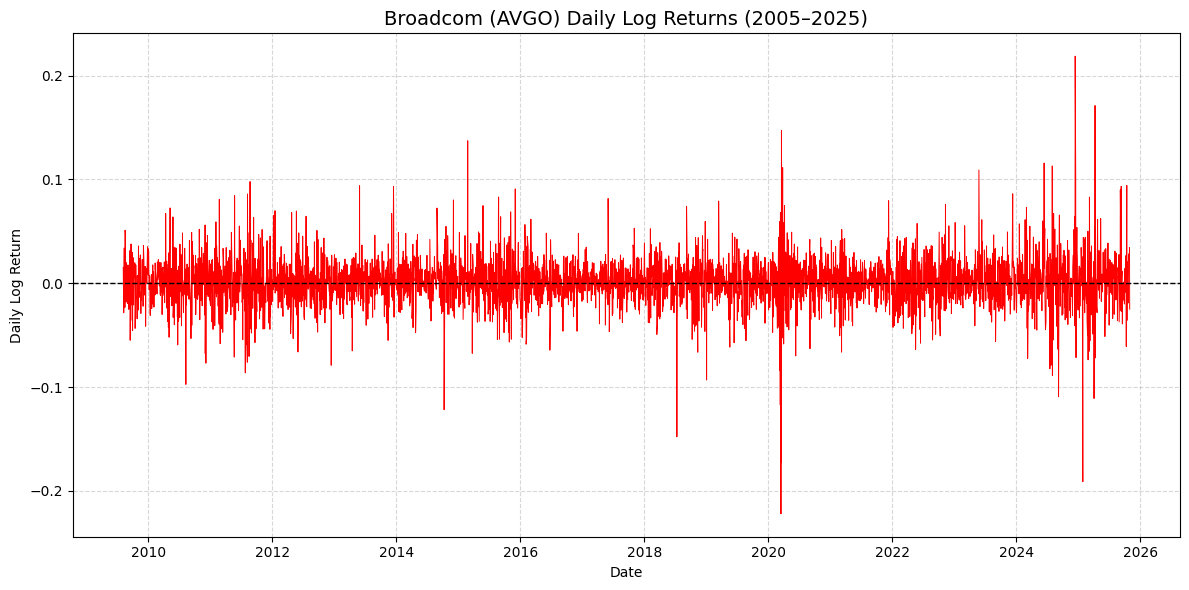

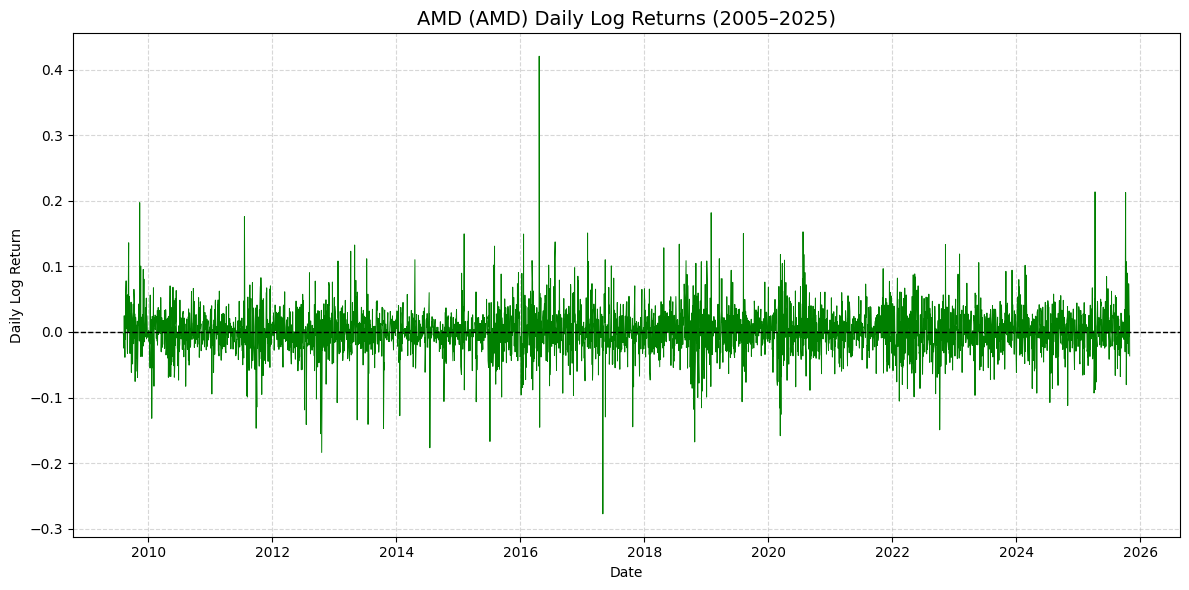

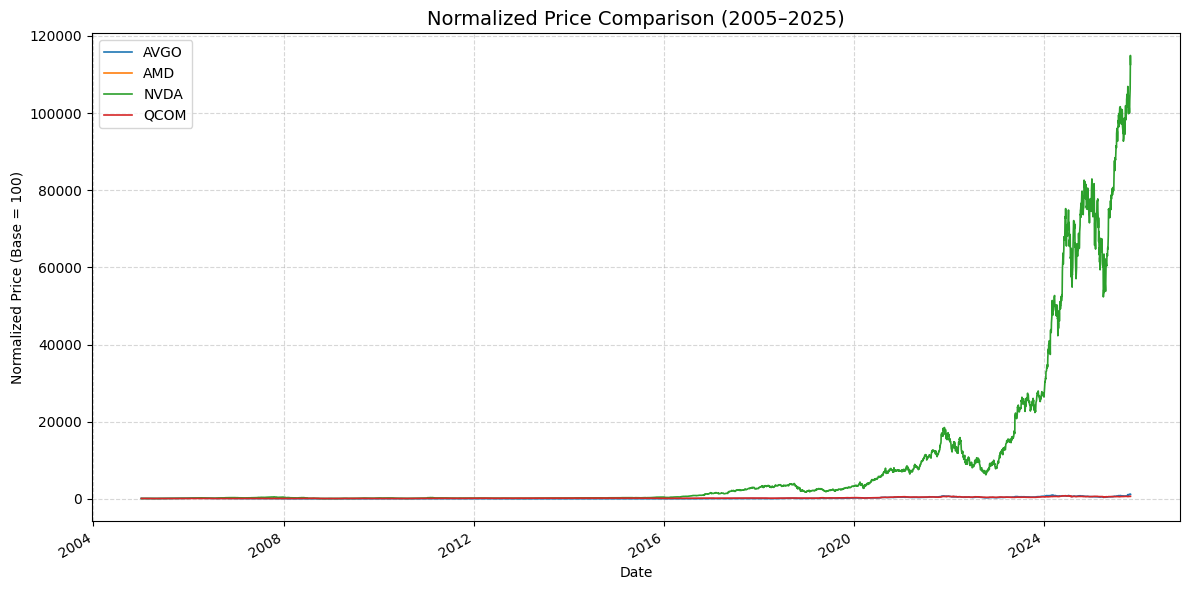

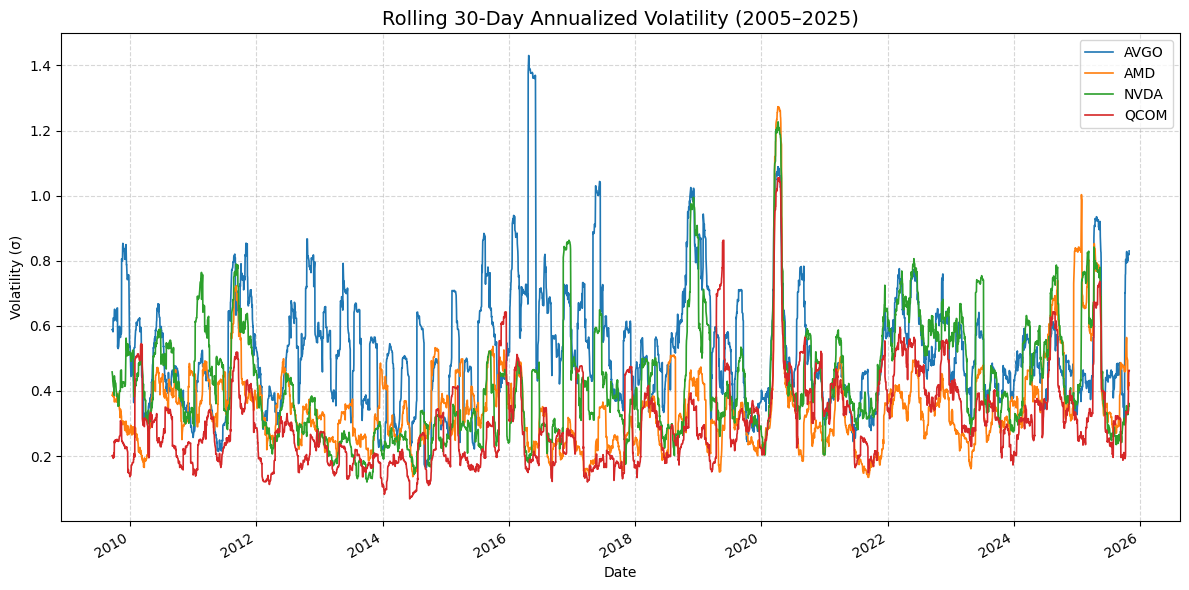


=== Summary Statistics ===
        Mean Daily Return  Daily Volatility  Annualized Return  \
Ticker                                                           
AMD                0.0010            0.0351             0.2610   
AVGO               0.0014            0.0237             0.3578   
NVDA               0.0016            0.0287             0.4020   
QCOM               0.0004            0.0211             0.1088   

        Annualized Volatility  
Ticker                         
AMD                    0.5573  
AVGO                   0.3760  
NVDA                   0.4551  
QCOM                   0.3352  


/tmp/ipython-input-3579804625.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(summary_stats["Annualized Volatility"][i] + 0.002,
/tmp/ipython-input-3579804625.py:84: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary_stats["Annualized Return"][i],


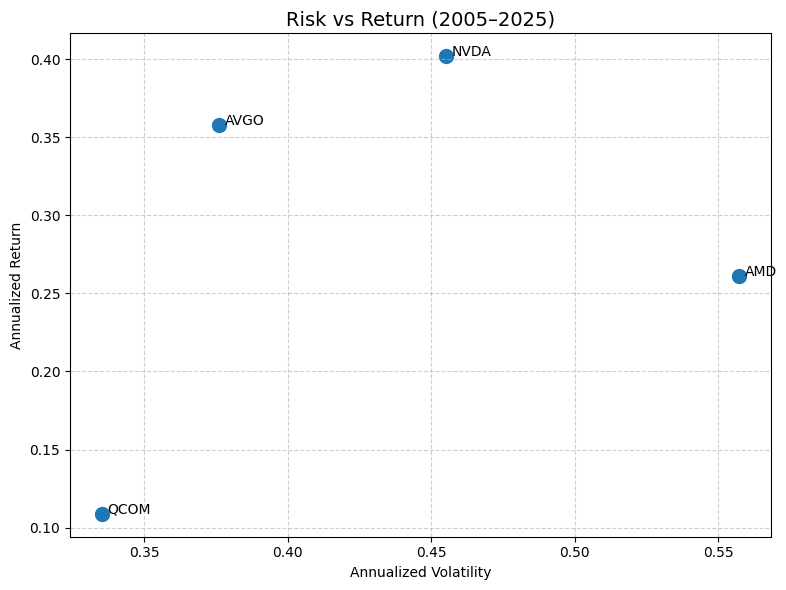


Running 20-day GARCH forecasts...

=== 20-Day Forecast (Last-Day Values) ===
AVGO: Expected Return = 0.1578%, Expected Volatility = 2.5430%
AMD: Expected Return = 0.1215%, Expected Volatility = 3.6166%
NVDA: Expected Return = 0.2020%, Expected Volatility = 2.8641%
QCOM: Expected Return = 0.0499%, Expected Volatility = 2.4891%


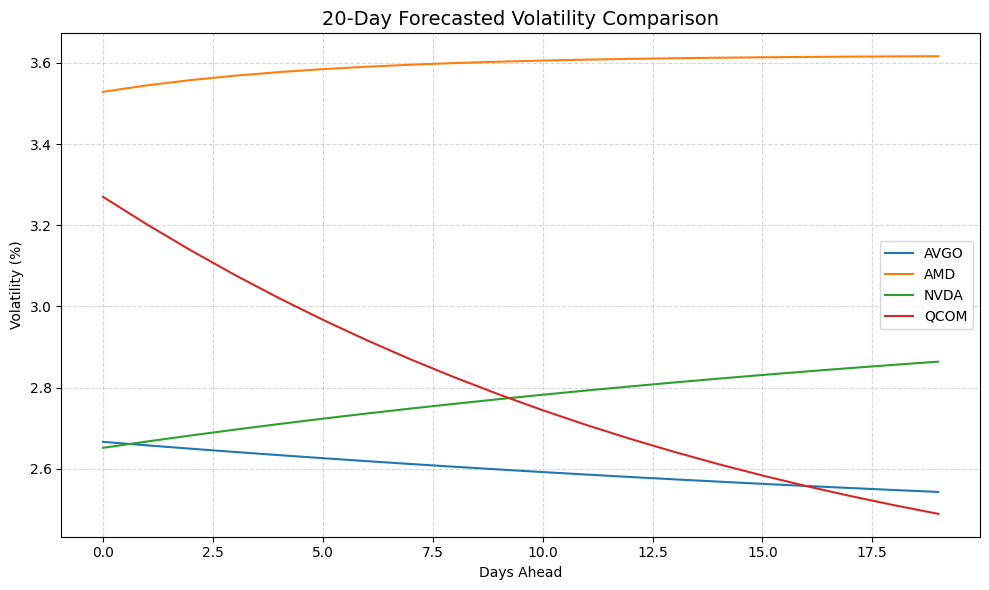

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

# Data Collection

tickers = ["AVGO", "AMD", "NVDA", "QCOM"]

print("Downloading data...")
data = yf.download(tickers, start="2005-01-01", end="2025-10-31")["Close"]

# Compute daily log returns
log_returns = np.log(data / data.shift(1))
log_returns.dropna(inplace=True)

# Historical Log Returns Plot (Broadcom)

plt.figure(figsize=(12,6))
plt.plot(log_returns.index, log_returns["AVGO"], color="red", linewidth=0.7)
plt.title("Broadcom (AVGO) Daily Log Returns (2005–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Log Return")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Historical Log Returns Plot (AMD)

plt.figure(figsize=(12,6))
plt.plot(log_returns.index, log_returns["AMD"], color="green", linewidth=0.7)
plt.title("AMD (AMD) Daily Log Returns (2005–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Daily Log Return")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Normalized Price Comparison

plt.figure(figsize=(12,6))
(data / data.iloc[0] * 100).plot(ax=plt.gca(), linewidth=1.2)
plt.title("Normalized Price Comparison (2005–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Normalized Price (Base = 100)")
plt.legend(tickers)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Rolling 30-Day Volatility

rolling_vol = log_returns.rolling(window=30).std() * np.sqrt(252)
plt.figure(figsize=(12,6))
rolling_vol.plot(ax=plt.gca(), linewidth=1.2)
plt.title("Rolling 30-Day Annualized Volatility (2005–2025)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Volatility (σ)")
plt.legend(tickers)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Summary Statistics (Risk–Return)

summary_stats = pd.DataFrame({
    "Mean Daily Return": log_returns.mean(),
    "Daily Volatility": log_returns.std(),
    "Annualized Return": log_returns.mean() * 252,
    "Annualized Volatility": log_returns.std() * np.sqrt(252)
})
print("\n=== Summary Statistics ===")
print(summary_stats.round(4))

# Risk–Return Scatter Plot

plt.figure(figsize=(8,6))
plt.scatter(summary_stats["Annualized Volatility"], summary_stats["Annualized Return"], s=100)
for i, ticker in enumerate(summary_stats.index):
    plt.text(summary_stats["Annualized Volatility"][i] + 0.002,
             summary_stats["Annualized Return"][i],
             ticker, fontsize=10)
plt.title("Risk vs Return (2005–2025)", fontsize=14)
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 620-Day GARCH(1,1) Forecast (Return & Risk)

forecast_results = {}

print("\nRunning 20-day GARCH forecasts")
for ticker in tickers:
    ret = log_returns[ticker].dropna() * 100  # scale to %
    model = arch_model(ret, vol="Garch", p=1, q=1, mean="Constant", dist="normal")
    res = model.fit(disp="off")
    fcast = res.forecast(horizon=20)
    forecast_results[ticker] = {
        "mean": fcast.mean.values[-1, :],
        "vol": np.sqrt(fcast.variance.values[-1, :])
    }

# Display final day forecasts
print("\n20-Day Forecast (Last-Day Values)")
for t, f in forecast_results.items():
    print(f"{t}: Expected Return = {f['mean'][-1]:.4f}%, Expected Volatility = {f['vol'][-1]:.4f}%")

# Forecast Visualization

plt.figure(figsize=(10,6))
for t in tickers:
    plt.plot(forecast_results[t]["vol"], label=t)
plt.title("20-Day Forecasted Volatility Comparison", fontsize=14)
plt.xlabel("Days Ahead")
plt.ylabel("Volatility (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
